In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
    color: black !important;
}

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 这个函数是用来统计一天的水印发放之后 每个窗口的平均等待时间和事件的迟到率

In [136]:
def get_late_df(LatePaths, threshold=0.4):
    ans = []
    for LatePath in LatePaths:
        lateEvent = pd.read_csv(LatePath)
        lateEvent.columns = ["window_end", "late_event", "all"]
        lateEvent['rate'] = lateEvent['late_event']/lateEvent['all']

        date_index = pd.date_range(start='2018-10-01 00:01:00',
                                   periods=len(lateEvent), 
                                   freq='T')
        
        index = [date_index[i].hour for i in range(len(date_index))]

        data = {
            "late_rate": lateEvent['rate'].tolist(),
            "threshold": [threshold for _ in range(len(lateEvent))],
        }

        df = pd.DataFrame(data=data, index=index)
        ans.append(df)
    return ans

### 分析在周期性水印下会出现的问题(以20181001为例)

1. 在水印延迟为0ms时，窗口大小为60s
2. 在水印延迟为500ms时，窗口大小为60s
3. 在水印延迟为1000ms时，窗口大小为60s
4. 在水印延迟为2000ms时，窗口大小为60s

In [137]:
Paths = [
            "./periodic/20170501P0.5W60//",
            "./periodic/20170501P3W60//",
            "./periodic/20170501P4W60//",
#             "./periodic/20181001P1.5W60/disorder.csv",
            "./periodic/20170501P5W60/"
           ]
Xlabls = [
    "latency: 0.3min window size: 60s",
    "latency: 3min window size: 60s",
    "latency: 4min window size: 60s",
    "latency: 5min window size: 60s"
]

In [138]:
LatePaths = [path+"disorder.csv" for path in Paths]
ans = get_late_df(LatePaths)

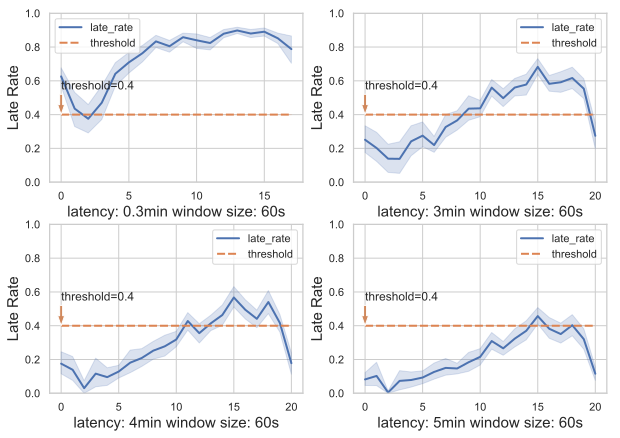

In [139]:
f, ax = plt.subplots(2,2, figsize = (10, 7))
for i in range(2):
    for j in range(2):
        ax[i][j].set_xlabel(Xlabls[i*2+j],fontsize=15)
        ax[i][j].set_ylabel('Late Rate',fontsize=15)
        # 标注 指定位置添加描述
        ax[i][j].annotate('threshold=0.4', xy=(0, 0.4),
                    xytext=(0, 0.6),
                    arrowprops=dict(facecolor='#d0885c', headwidth=7, width=3,
                                    headlength=10),
                    horizontalalignment='left', verticalalignment='top')
        # 限制y轴的值
        ax[i][j].set_ylim([0, 1])
        sns.lineplot(size='event', data=ans[i*2+j], ax=ax[i][j])
# 设置间距
plt.subplots_adjust(wspace=0.2, hspace=0.25)